In [2]:
import json

In [3]:
with open("data/raw_data.json") as f:
    data = json.load(f)

for item in data:
    genres = []
    for genre in item["genres"].split(", "):
        genres.append(genre.lower().removesuffix(" game"))
    item["genres"] = genres

with open("data/data.json", 'w') as f:
    json.dump(data, f)

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_json("data/raw_data.json")

In [6]:
df.head()

,name,developer,publisher,genres,operating_systems,release_date
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,"June 24, 2015"
1,A-Train,Artdink,".mw-parser-output .plainlist ol,.mw-parser-out...",Vehicle Simulation Game,"Windows, Mac",1985
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac","November 30, 1996"
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,"September 6, 1996"
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1070 non-null   object
 1   developer          1070 non-null   object
 2   publisher          1070 non-null   object
 3   genres             1070 non-null   object
 4   operating_systems  1070 non-null   object
 5   release_date       1070 non-null   object
dtypes: object(6)
memory usage: 50.3+ KB


In [8]:
df.release_date = pd.to_datetime(df.release_date, format="mixed", errors="coerce")
df.head()

,name,developer,publisher,genres,operating_systems,release_date
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,2015-06-24
1,A-Train,Artdink,".mw-parser-output .plainlist ol,.mw-parser-out...",Vehicle Simulation Game,"Windows, Mac",1985-01-01
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac",1996-11-30
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,1996-09-06
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996-01-01


In [9]:
all_genres = []
for genres in df.genres:
    for genre in np.array(genres.split(", ")):
        genre = genre.lower().removesuffix(" game")
        if genre != "":
            all_genres.append(genre)
all_genres

['adventure',
 'puzzle',
 'vehicle simulation',
 'flight simulator',
 'adventure',
 'educational',
 'educational',
 'action',
 'platform',
 'adventure',
 'platform',
 'action-adventure',
 'strategy',
 'fine art',
 'educational',
 'simulation',
 'action',
 'rhythm/music',
 'racing',
 'sports',
 'action',
 'real-time tactics',
 'racing',
 'first-person shooter',
 'third-person shooter',
 'action role-playing',
 'roguelike',
 'action-adventure',
 'adventure',
 'art',
 'simulation',
 'action role-playing',
 'fighting',
 'exploration',
 'combat flight simulator',
 'combat flight simulator',
 'action-adventure',
 'third-person shooter',
 'platform',
 'first-person shooter',
 'mmo',
 '3d space shooter',
 'graphic adventure (point-and-click)',
 'combat flight simulator',
 'rail shooter',
 'combat flight simulator',
 'real-time strategy',
 'real-time strategy',
 'wargame',
 'strategy',
 'computer wargaming',
 'word',
 'real-time strategy',
 'real-time strategy (rts)',
 'real-time strategy (rts)

In [11]:
genre_label, genre_count = np.unique(all_genres, return_counts=True)

genre_data = {}
for i in reversed(np.argsort(genre_count)):
    genre_data[genre_label[i]] = int(genre_count[i])

with open("data/genres.json", 'w') as f:
    json.dump(genre_data, f)

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [69]:
def plot_top(data, number: int):
    data_label, data_count = np.unique(data, return_counts=True)

    result_count = []
    result_label = []

    for i in reversed(np.argsort(data_count)[-number:]):
        result_count.append(data_count[i])
        result_label.append(data_label[i])

    plot = plt.bar(x=result_label, height=result_count)
    plt.ylabel('Number of games')
    plt.xticks(range(len(result_label)), result_label, rotation=60.0, ha='right', rotation_mode='anchor')

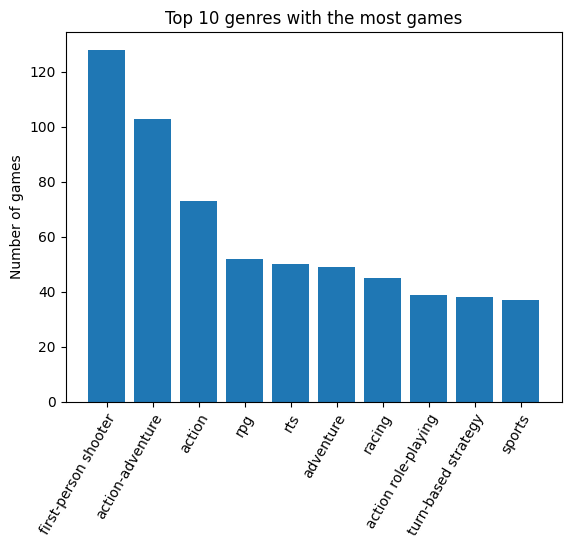

In [74]:
plot_top(all_genres, 10)
plt.title('Top 10 genres with the most games')
plt.savefig('static/genres.png', bbox_inches='tight')

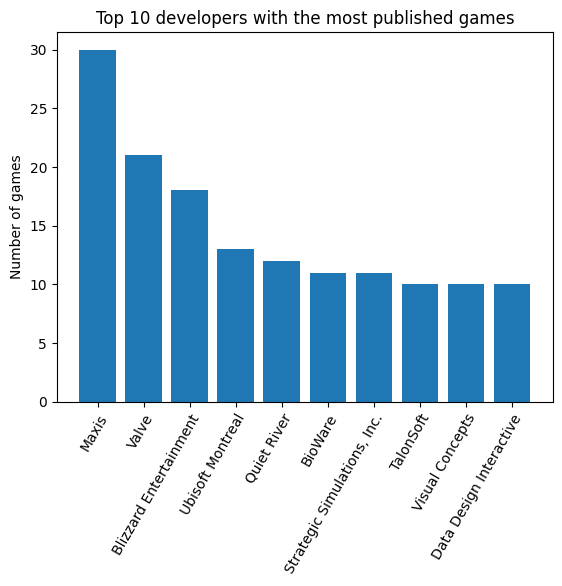

In [75]:
plot_top(df.developer, 10)
plt.title('Top 10 developers with the most published games')
plt.savefig('static/developers.png', bbox_inches='tight')

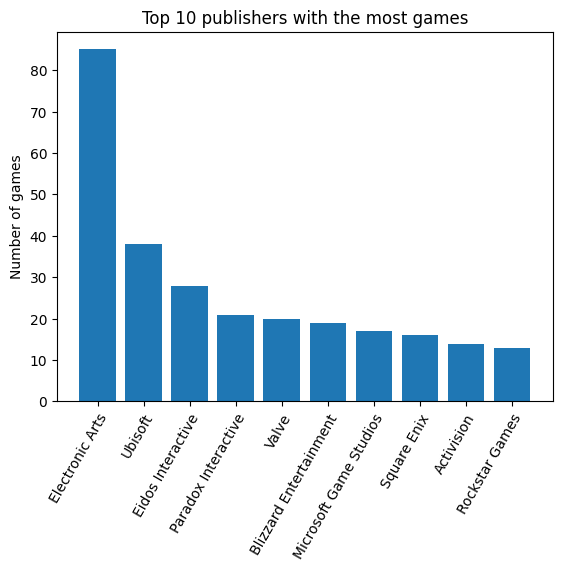

In [76]:
plot_top(df.publisher, 10)
plt.title('Top 10 publishers with the most games')
plt.savefig('static/publishers.png', bbox_inches='tight')

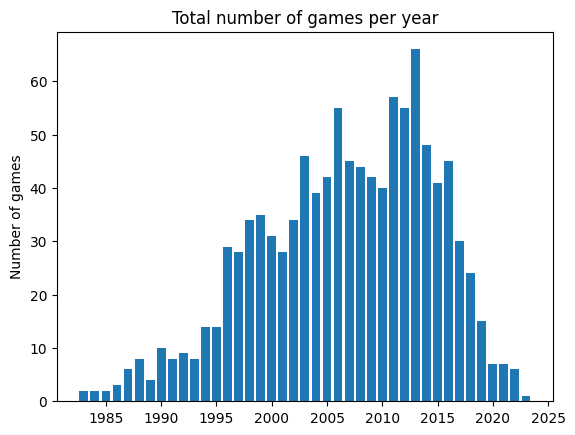

In [78]:
years = pd.DatetimeIndex(df.release_date).year
years = np.sort(years)
years, years_count = np.unique(years, return_counts=True)

p = plt.bar(years, years_count)
plt.ylabel('Number of games')
plt.title('Total number of games per year')
plt.savefig('static/per_year.png', bbox_inches='tight')